In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
titanic_ds = pd.read_csv("titanic.csv")

In [4]:
titanic_ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Preprocessing

    1. Create new dataframe with colums that will determine clusters
    2. Encode Sex colum to 0 and 1
    3. Use PCA for dimensionality reduction, so we can plot datapoints easily
    
As you can see there is one column called Age which is not in  the same scale as the rest of our data, BUT because we are use PCA everything will be on the same scale.


### Creating new dataframe

In [6]:
new_ds = titanic_ds
new_ds = new_ds.drop(['Name','Ticket','Fare','Embarked'], axis=1)
new_ds.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,NaN
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,NaN
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,NaN


In [7]:
new_ds.fillna(0, inplace=True)

In [8]:
new_ds.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,0
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,0
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,0


### Encoding Sex column using LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
encoded_sex = encoder.fit_transform(new_ds.iloc[:, 3])

In [12]:
new_ds['Sex'] = encoded_sex

In [13]:
new_ds.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,1,22.0,1,0,0
1,2,1,1,0,38.0,1,0,C85
2,3,1,3,0,26.0,0,0,0
3,4,1,1,0,35.0,1,0,C123
4,5,0,3,1,35.0,0,0,0


In [14]:
features = new_ds.iloc[:, 1:-1].values

In [15]:
print(features)

[[ 0.  3.  1. 22.  1.  0.]
 [ 1.  1.  0. 38.  1.  0.]
 [ 1.  3.  0. 26.  0.  0.]
 ...
 [ 0.  3.  0.  0.  1.  2.]
 [ 1.  1.  1. 26.  0.  0.]
 [ 0.  3.  1. 32.  0.  0.]]


### Using Principal Component Analysis for dimensionality reduction

In [16]:
from sklearn.decomposition import PCA

In [17]:
titanic_pca = PCA(n_components=4)
titanic_pca.fit(features)
test = titanic_pca.transform(features)

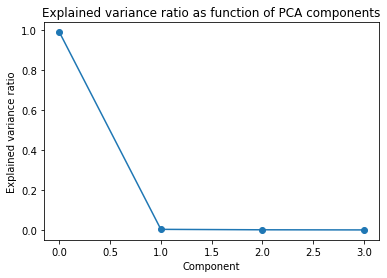

In [18]:
plt.plot(list(titanic_pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

This PCA above with 4 components was for testing. We will need 2 components for 2D plotting, also for every clustering algorithm wa are going to use reduced_features with 2 features.

In [19]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(features)

## Clustering

### KMeans

In [20]:
from sklearn.cluster import KMeans

In [27]:
km = KMeans(n_clusters=5)
clusters = km.fit(reduced_features)

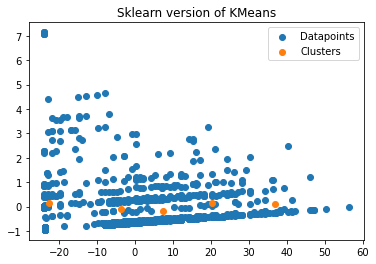

In [29]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [30]:
reduced_features.shape

(891, 2)

In [31]:
clusters.cluster_centers_

array([[ -3.55585101,  -0.10161391],
       [ 20.40166879,   0.15568667],
       [  7.26957844,  -0.16324169],
       [-22.6707669 ,   0.13760433],
       [ 36.77858312,   0.12392474]])

### Elbow Method

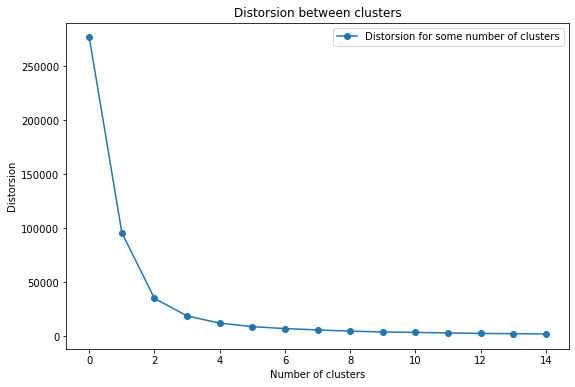

In [39]:
cluster_distorsion = []
for i in range(1, 16):
    test_sklearn = KMeans(n_clusters=i)
    test_sklearn.fit(reduced_features)
    cluster_distorsion.append(test_sklearn.inertia_)
plt.figure(figsize=(9, 6))
plt.plot(cluster_distorsion, marker='o', label='Distorsion for some number of clusters')
plt.title("Distorsion between clusters")
plt.xlabel('Number of clusters')
plt.ylabel("Distorsion")
plt.legend()
plt.show()

### Mean Shift 

In [40]:
from sklearn.cluster import MeanShift

In [41]:
mean_shift_sklearn = MeanShift(bandwidth=6.5)

In [42]:
clust = mean_shift_sklearn.fit(reduced_features)

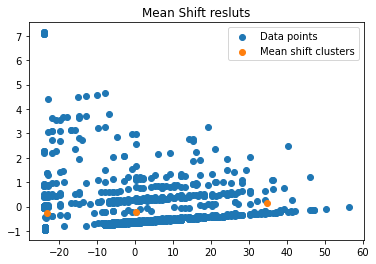

In [43]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Data points')
plt.scatter(clust.cluster_centers_[:, 0], clust.cluster_centers_[:, 1], label='Mean shift clusters')
plt.title("Mean Shift resluts")
plt.legend()
plt.show()

### Conclusion:

We have got very interesting resluts buy analysing clusters. As we know the most survivers were women and as we can see not majority was from first and second class. There are a lot survivers from class three as well.